Directory:
C:\Users\adarcher\Downloads\rastermap-master\rastermap-master\rastermap
File shape:
(824, 67502)
time; iteration;  explained PC variance
0.00s     0        0.0073
0.01s    10        0.0162
0.02s    20        0.0275
0.03s    30        0.0478
0.04s    40        0.0524
0.05s    50        0.0530
0.05s   final      0.0529
0.05s upsampled    0.0544
time; iteration;  explained PC variance
0.00s     0        0.0073
0.01s    10        0.0162
0.03s    20        0.0275
0.04s    30        0.0478
0.05s    40        0.0524
0.06s    50        0.0530
0.06s   final      0.0529
0.06s upsampled    0.0544


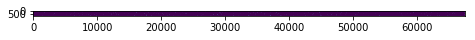

In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt
path = 'C:/Users/adarcher/Downloads/rastermap-master/rastermap-master/rastermap'
os.chdir(path)
print('Directory:')
print(os.getcwd())
from mapping import Rastermap
from rastermap import Rastermap

model = Rastermap(n_components=1, n_X=30, nPC=200, init='pca')

sp = np.load('C:/Users/adarcher/Desktop/suite2p/plane0/spks.npy')

# zcoring spikes 
sp = zscore(sp, axis=1)

print('File shape:')
print(sp.shape)
model.fit(sp)

ax = plt.axes([1, 1, 1, 1])
ax.imshow(sp[model.isort1, :], interpolation='none')
#plt.imshow(sp[model.isort1, :])

# fit_transform returns embedding (upsampled cluster identities)
embedding = model.fit_transform(sp)

# embedding : array-like, shape (n_samples, n_components) Stores the embedding vectors.
# u,sv,v : singular value decomposition of data S, potentially with smoothing
# isort1 : sorting along first dimension (n_samples) of matrix
# isort2 : sorting along second dimension (n_features) of matrix (if n_Y > 0)
# cmap : correlation of each item with all locations in the embedding map (before upsampling)
# A : PC coefficients of each Fourier mode

In [51]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
from matplotlib import cm
from scipy.stats import zscore

### sort neurons and smooth across neurons and zscore in time
isort = np.argsort(model.embedding[:,0])
Sm = gaussian_filter1d(sp[isort,:].T, np.minimum(3,int(sp.shape[0]*0.005)), axis=1)
Sm = Sm.T

In [52]:
print(model.embedding[:,0])
print(sp[isort,:])

[0.37       0.66333333 0.61       0.23333333 0.47333333 0.16666667
 0.23333333 0.56666667 0.74       0.2        0.96       0.62666667
 0.3        0.86666667 0.31666667 0.96       0.00666667 0.26333333
 0.13       0.96       0.13666667 0.19666667 0.17       0.60333333
 0.69333333 0.01       0.01333333 0.79666667 0.47       0.97333333
 0.36333333 0.43333333 0.03       0.50666667 0.53333333 0.19333333
 0.00666667 0.77       0.20333333 0.14333333 0.73666667 0.3
 0.65333333 0.66       0.53333333 0.29666667 0.39666667 0.07333333
 0.49       0.13333333 0.53       0.09666667 0.34       0.72666667
 0.90666667 0.68666667 0.65666667 0.15       0.20333333 0.5
 0.01666667 0.23       0.36666667 0.13666667 0.76666667 0.39666667
 0.36666667 0.76666667 0.16666667 0.33333333 0.73666667 0.01
 0.87333333 0.06       0.30666667 0.00666667 0.56333333 0.1
 0.87       0.91       0.39333333 0.82333333 0.60333333 0.43333333
 0.47666667 0.52333333 0.33333333 0.70333333 0.17666667 0.00666667
 0.63666667 0.00666667

[[ 0.2804878  -0.25700805  0.05318605 ...  0.18636723 -0.25543612
   0.4505042 ]
 [ 0.22791262 -0.25621912  0.0991224  ...  0.20976754 -0.25316367
   0.37851158]
 [ 0.13750368 -0.25473407  0.17638654 ...  0.24843843 -0.24788153
   0.25558165]
 ...
 [-0.27076593 -0.26668337 -0.2435799  ... -0.15244487  0.08918112
   0.270106  ]
 [-0.27350587 -0.2721194  -0.25859165 ... -0.19562624 -0.00735051
   0.31038746]
 [-0.2749875  -0.27445543 -0.26568177 ... -0.21865407 -0.06229061
   0.32863697]]


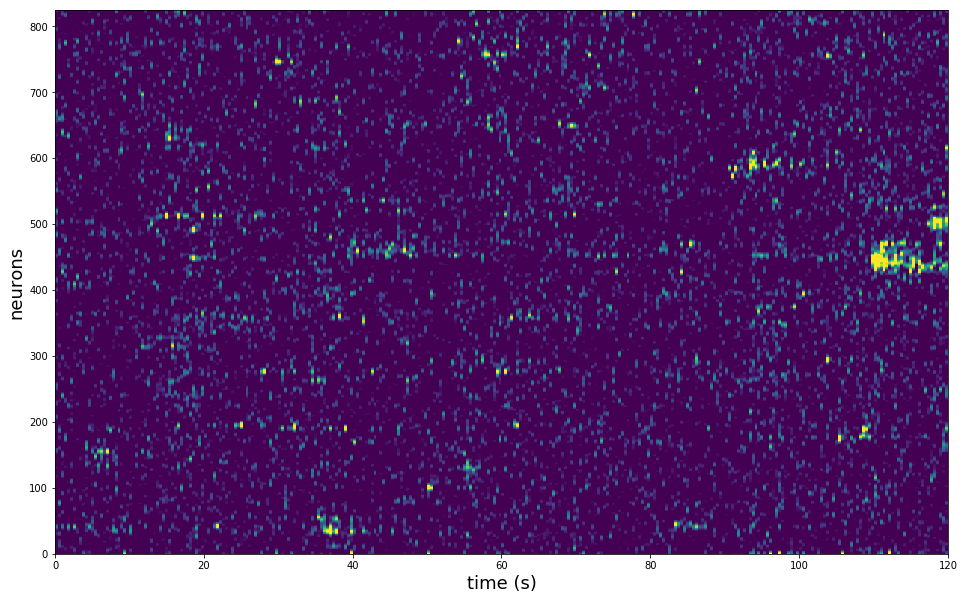

In [53]:
### from MouseLand, run_rastermap.ipynb
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,1500:1800]
print(splot)

plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()

[]


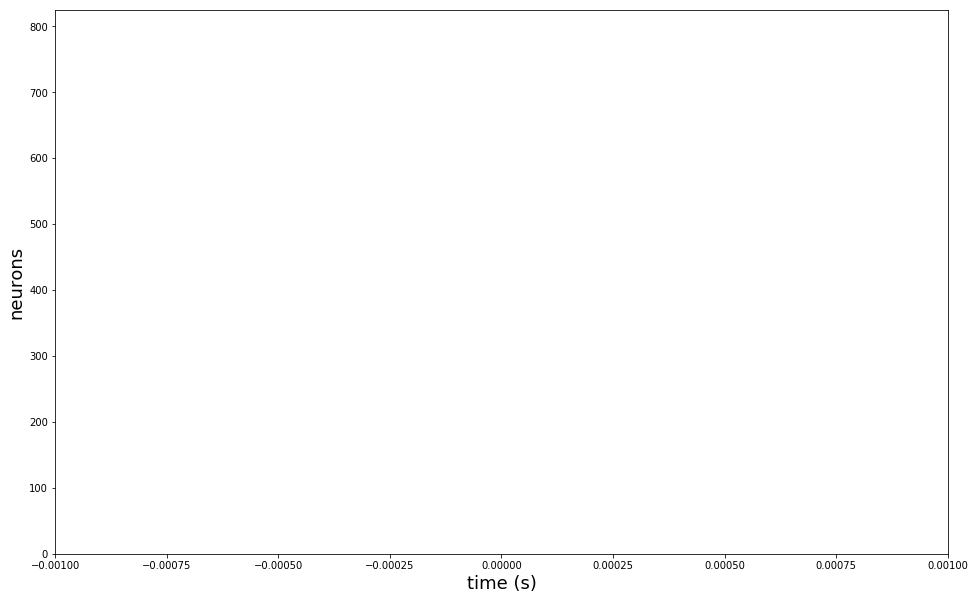

In [48]:
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,model.isort2]
print(splot)


plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()